Stack Exchange contains questions and answers that can be up or downvoted. The sites datascience.stackexchange and Stack Overflow look useful for our data science goals. We will use this information to determine what types of data science questions are popular. 

The tables with the highest number of tag counts would be more promising towards finding the most popular content. The include tags for machine learning and building models. Also Posts, Tags, AnswerCount, CommentCount, FavoriteCount, UpVotes, and PostTags.

In [1]:
#SELECT Id,
 #      CreationDate, 
  #     Score, 
   #    ViewCount, 
    #   Tags, 
     #  AnswerCount, 
      # FavoriteCount
#FROM Posts
#WHERE PostTypeID = 1 AND YEAR(CreationDate) = 2019;

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
questions = pd.read_csv("2019_questions.csv", parse_dates = ["CreationDate"])

In [4]:
questions.head()

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,44419,2019-01-23 09:21:13,1,21,<machine-learning><data-mining>,0,NaN
1,44420,2019-01-23 09:34:01,0,25,<machine-learning><regression><linear-regressi...,0,NaN
2,44423,2019-01-23 09:58:41,2,1651,<python><time-series><forecast><forecasting>,0,NaN
3,44427,2019-01-23 10:57:09,0,55,<machine-learning><scikit-learn><pca>,1,NaN
4,44428,2019-01-23 11:02:15,0,19,<dataset><bigdata><data><speech-to-text>,0,NaN


In [5]:
questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8839 entries, 0 to 8838
Data columns (total 7 columns):
Id               8839 non-null int64
CreationDate     8839 non-null datetime64[ns]
Score            8839 non-null int64
ViewCount        8839 non-null int64
Tags             8839 non-null object
AnswerCount      8839 non-null int64
FavoriteCount    1407 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 483.5+ KB


FavoriteCount is missing values. In order to get them, we'd have to look at 7400 questions. This is not practical. Also, it should be an integer, not a float. The types of the remaining columns are reasonable. In Tags it would be helpful to remove the <> and study the most common tags.

In [6]:
questions.isnull().sum()

Id                  0
CreationDate        0
Score               0
ViewCount           0
Tags                0
AnswerCount         0
FavoriteCount    7432
dtype: int64

The above confirms that FavoriteCount has 7432 missing values.

In [7]:
questions = questions.fillna(0)

In [8]:
questions.isnull().sum()

Id               0
CreationDate     0
Score            0
ViewCount        0
Tags             0
AnswerCount      0
FavoriteCount    0
dtype: int64

We have just replaced the null ("NaN") missing FavoriteCount values with 0. Now we will change the data type for this column to an integer.

In [9]:
questions['FavoriteCount'] = questions['FavoriteCount'].astype(int)

In [10]:
questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8839 entries, 0 to 8838
Data columns (total 7 columns):
Id               8839 non-null int64
CreationDate     8839 non-null datetime64[ns]
Score            8839 non-null int64
ViewCount        8839 non-null int64
Tags             8839 non-null object
AnswerCount      8839 non-null int64
FavoriteCount    8839 non-null int64
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 483.5+ KB


In [11]:
questions['Tags'].head(5)

0                      <machine-learning><data-mining>
1    <machine-learning><regression><linear-regressi...
2         <python><time-series><forecast><forecasting>
3                <machine-learning><scikit-learn><pca>
4             <dataset><bigdata><data><speech-to-text>
Name: Tags, dtype: object

In [12]:
questions['Tags'] = questions['Tags'].str.replace("^<|>$", "")
questions['Tags'].head(5)

0                        machine-learning><data-mining
1    machine-learning><regression><linear-regressio...
2           python><time-series><forecast><forecasting
3                  machine-learning><scikit-learn><pca
4               dataset><bigdata><data><speech-to-text
Name: Tags, dtype: object

In [13]:
questions['Tags'] = questions['Tags'].str.split("><")
questions['Tags'].head(5)

0                      [machine-learning, data-mining]
1    [machine-learning, regression, linear-regressi...
2         [python, time-series, forecast, forecasting]
3                [machine-learning, scikit-learn, pca]
4             [dataset, bigdata, data, speech-to-text]
Name: Tags, dtype: object

In [14]:
questions.head(3)

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,44419,2019-01-23 09:21:13,1,21,"[machine-learning, data-mining]",0,0
1,44420,2019-01-23 09:34:01,0,25,"[machine-learning, regression, linear-regressi...",0,0
2,44423,2019-01-23 09:58:41,2,1651,"[python, time-series, forecast, forecasting]",0,0


In [15]:
num_tags = {}

for tags in questions['Tags']:
    for tag in tags:
        if tag in num_tags:
            num_tags[tag] += 1
        else:
            num_tags[tag] = 1
print(num_tags)

{'pathfinder': 1, 'siamese-networks': 4, 'smotenc': 4, 'multi-instance-learning': 2, 'deep-learning': 1220, 'time-series': 466, 'transfer-learning': 69, 'labels': 28, 'ml': 7, 'text-mining': 113, 'noisification': 1, 'openai-gym': 17, 'activation': 1, 'normal-equation': 1, 'neural': 16, 'c++': 1, 'image-preprocessing': 67, 'pytorch': 175, 'keras-rl': 6, 'dynamic-programming': 3, 'scikit-learn': 540, 'bayesian': 40, 'kendalls-tau-coefficient': 1, 'automl': 2, 'nn': 1, 'graphs': 47, 'opencv': 39, 'evolutionary-algorithms': 11, 'java': 14, 'annotation': 12, 'causalimpact': 2, '3d-reconstruction': 9, 'sematic-similarity': 2, 'class-imbalance': 73, 'glm': 3, 'sensors': 5, 'optimization': 124, 'dataframe': 81, 'seaborn': 38, 'word2vec': 88, 'dqn': 36, '3d-object-detection': 1, 'unsupervised-learning': 110, 'dropout': 15, 'gaussian': 20, 'hog': 1, 'matlab': 62, 'theano': 4, 'metric': 60, 'dataset': 340, 'career': 9, 'ibm-watson': 1, 'naive-bayes-classifier': 42, 'state-of-the-art': 1, 'spss': 

In [16]:
no_of_tags = pd.DataFrame.from_dict(num_tags, orient='index')
print(no_of_tags.head())

                            0
pathfinder                  1
siamese-networks            4
smotenc                     4
multi-instance-learning     2
deep-learning            1220


In [17]:
times_tag_used = no_of_tags.sort_values([0])#times_tag_used is no_of_tags, 
                                            #I have just renamed it
times_tag_used.rename(columns={0:"Times Tag Used"}, inplace=True)
print(times_tag_used)                        

                            Times Tag Used
pathfinder                               1
kitti-dataset                            1
multivariate-distribution                1
community                                1
state-of-the-art                         1
spyder                                   1
ibm-watson                               1
goss                                     1
hurdle-model                             1
redshift                                 1
amazon-ml                                1
adaboost                                 1
hog                                      1
dump                                     1
summarunner-architecture                 1
3d-object-detection                      1
xboost                                   1
rmse                                     1
pgm                                      1
siamese                                  1
history                                  1
exploitation                             1
rdkit      

In [18]:
top_times_tags_used = times_tag_used.sort_values(by="Times Tag Used").tail(20)
top_times_tags_used

,Times Tag Used
machine-learning-model,224
statistics,234
clustering,257
predictive-modeling,265
r,268
dataset,340
regression,347
pandas,354
lstm,402
time-series,466


The above are the top most used tags. Let us see how this looks graphically.

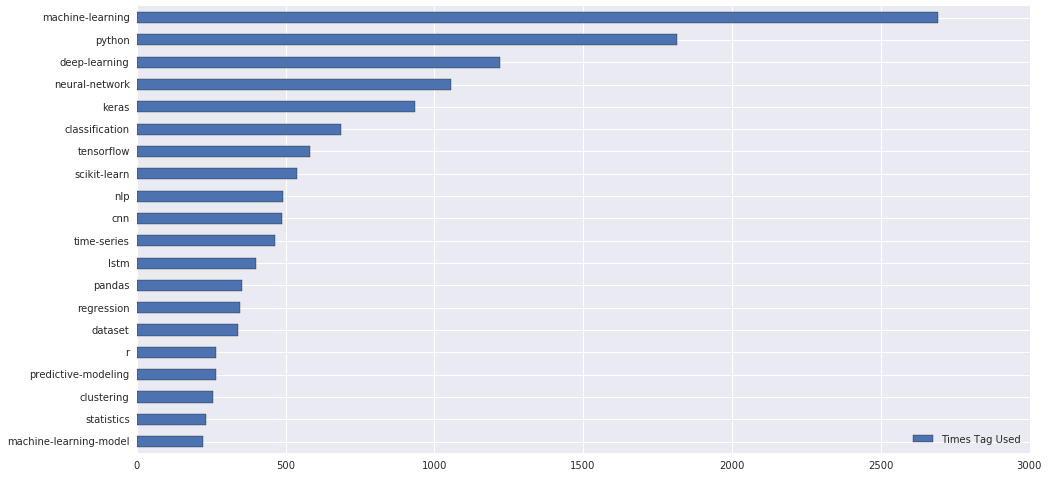

In [19]:
import matplotlib.pyplot as plt
import numpy as np
%magic inline

top_times_tags_used.plot(kind='barh', figsize=(16,8))
plt.show()

In [20]:
num_views = {}
for index, row in questions.iterrows():
    for tag in row['Tags']:
        if tag in num_views:
            num_views[tag] += row["ViewCount"]
    else:
            num_views[tag] = row["ViewCount"]
print(num_views)

{'pathfinder': 266, 'siamese-networks': 38, 'smotenc': 55, 'multi-instance-learning': 63, 'policy-gradients': 38, 'time-series': 22, 'transfer-learning': 246, 'labels': 459, 'ml': 21, 'text-mining': 59, 'noisification': 9, 'openai-gym': 471, 'stanford-nlp': 31, 'activation': 15, 'normal-equation': 103, 'neural': 21, 'c++': 24, 'image-preprocessing': 319, 'pytorch': 33, 'keras-rl': 230, 'dynamic-programming': 758, 'reinforcement-learning': 119, 'bayesian': 81, 'kendalls-tau-coefficient': 474, 'automl': 12, 'nn': 115, 'graphs': 130, 'opencv': 206, 'evolutionary-algorithms': 253, 'java': 249, 'annotation': 14, 'causalimpact': 49, '3d-reconstruction': 9, 'sematic-similarity': 36, 'class-imbalance': 44, 'glm': 11, 'sensors': 8, 'optimization': 58, 'dataframe': 549, 'seaborn': 212, 'word2vec': 852, 'dqn': 30, 'unsupervised-learning': 35, 'dropout': 135, 'gaussian': 40, 'hog': 18, 'matlab': 31, 'theano': 22, 'metric': 159, 'dataset': 422, 'career': 45, 'pac-learning': 164, 'naive-bayes-classi

In [21]:
num_views = pd.DataFrame.from_dict(num_views, orient='index')
num_views.rename(columns={0: "Times Tags Viewed"}, inplace=True)
print(num_views)

                          Times Tags Viewed
pathfinder                              266
siamese-networks                         38
smotenc                                  55
multi-instance-learning                  63
policy-gradients                         38
time-series                              22
transfer-learning                       246
labels                                  459
ml                                       21
text-mining                              59
noisification                             9
openai-gym                              471
stanford-nlp                             31
activation                               15
normal-equation                         103
neural                                   21
c++                                      24
image-preprocessing                     319
pytorch                                  33
keras-rl                                230
dynamic-programming                     758
reinforcement-learning          

In [22]:
top_views = num_views.sort_values(by="Times Tags Viewed").tail(20)
top_views

,Times Tags Viewed
aws-lambda,964
nlp,970
pyspark,988
anaconda,1113
deep-learning,1138
randomized-algorithms,1195
svm,1231
data-mining,1506
data,1641
python,1646


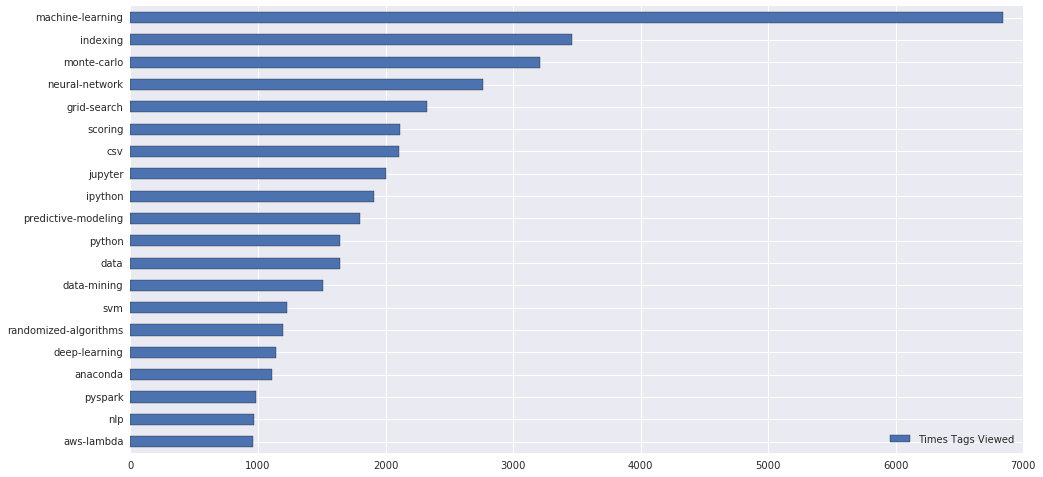

In [23]:
top_views.plot(kind='barh', figsize=(16,8))
plt.show()

Seeing the plots side by side we have the following.

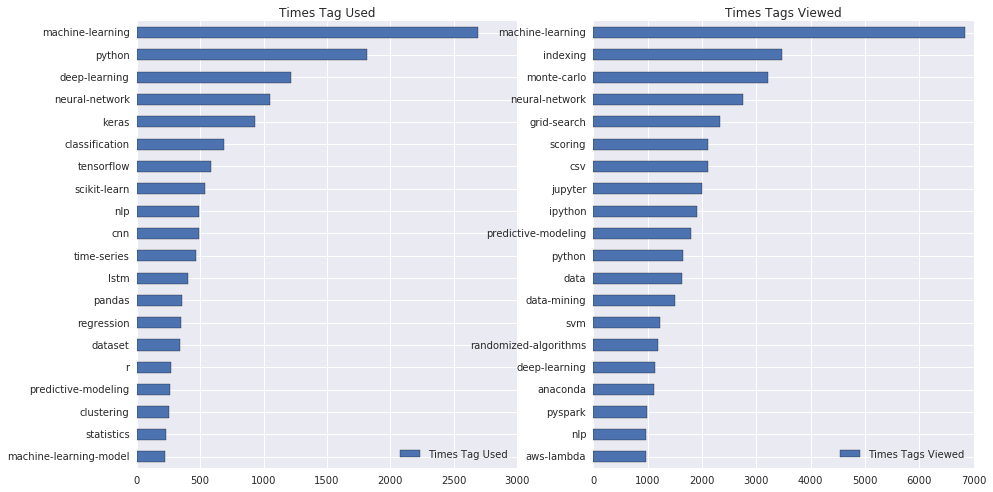

In [24]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,8))
top_times_tags_used.plot(kind='barh', ax=axes[0], subplots=True)
top_views.plot(kind='barh', ax=axes[1], subplots=True)
plt.show()

Among the top ten tags are: python, machine-learning, deep-learning, neural-network, keras, tensorflow, classification, and scikit-learn. Let's look at how these may be related. Deep learning is an area of machine learning.Neural networks are used in modeling often complex data in a way that mimics the brain. Keras is a neural network library written in Python. TensorFlow is an open source machine larning library. Scikit-Learn is a Python module used for machine learning, among other things. Classification is used in supervised learning, a part of the machine learning process. So we see the interconnectedness of these tags.

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [26]:
all_quests = pd.read_csv("all_questions.csv", parse_dates=["CreationDate"])
all_quests.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21576 entries, 0 to 21575
Data columns (total 3 columns):
Id              21576 non-null int64
CreationDate    21576 non-null datetime64[ns]
Tags            21576 non-null object
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 505.8+ KB


In [27]:
all_quests['Tags'] = all_quests['Tags'].str.replace("^<|>$", "").str.split("><")
print(all_quests['Tags'].head(5))

0        [python, keras, tensorflow, cnn, probability]
1                                     [neural-network]
2                        [python, ibm-watson, chatbot]
3                                              [keras]
4    [r, predictive-modeling, machine-learning-mode...
Name: Tags, dtype: object


In [28]:
quest_tags = {}

for tags in all_quests['Tags']:
    for tag in tags:
        if tag in quest_tags:
            quest_tags[tag] += 1
        else:
            quest_tags[tag] = 1
print(quest_tags)

{'pathfinder': 1, 'siamese-networks': 6, 'bioinformatics': 17, 'multi-instance-learning': 2, 'policy-gradients': 41, 'time-series': 1005, 'transfer-learning': 99, 'labels': 65, 'ml': 8, 'metadata': 10, 'methods': 14, 'openai-gym': 23, 'activation': 1, 'normal-equation': 6, 'vae': 16, 'neural': 17, 'c++': 1, 'image-preprocessing': 71, 'pytorch': 239, 'keras-rl': 10, 'dynamic-programming': 5, 'reinforcement-learning': 413, 'bayesian': 76, 'kendalls-tau-coefficient': 1, 'automl': 4, 'nn': 1, 'graphs': 139, 'opencv': 52, 'evolutionary-algorithms': 12, 'java': 58, 'annotation': 16, 'marginal-effects': 1, 'causalimpact': 2, '3d-reconstruction': 9, 'separable': 1, 'sematic-similarity': 3, 'class-imbalance': 133, 'glm': 19, 'statistics': 650, 'optimization': 290, 'rattle': 3, 'dataframe': 157, 'mathematics': 19, 'word2vec': 244, 'dqn': 63, '3d-object-detection': 1, 'unsupervised-learning': 271, 'gaussian': 51, 'hog': 3, 'matlab': 144, 'theano': 46, 'metric': 95, 'dataset': 893, 'career': 49, '

In [29]:
quest_tags = pd.DataFrame.from_dict(num_tags, orient='index')
quest_tags.rename(columns={0: "Times Tags Used"}, inplace=True)
print(quest_tags)

                          Times Tags Used
pathfinder                              1
siamese-networks                        4
smotenc                                 4
multi-instance-learning                 2
deep-learning                        1220
time-series                           466
transfer-learning                      69
labels                                 28
ml                                      7
text-mining                           113
noisification                           1
openai-gym                             17
activation                              1
normal-equation                         1
neural                                 16
c++                                     1
image-preprocessing                    67
pytorch                               175
keras-rl                                6
dynamic-programming                     3
scikit-learn                          540
bayesian                               40
kendalls-tau-coefficient          

In [30]:
top_qtags_used = quest_tags.sort_values(by="Times Tags Used").tail(20)
top_qtags_used

,Times Tags Used
machine-learning-model,224
statistics,234
clustering,257
predictive-modeling,265
r,268
dataset,340
regression,347
pandas,354
lstm,402
time-series,466


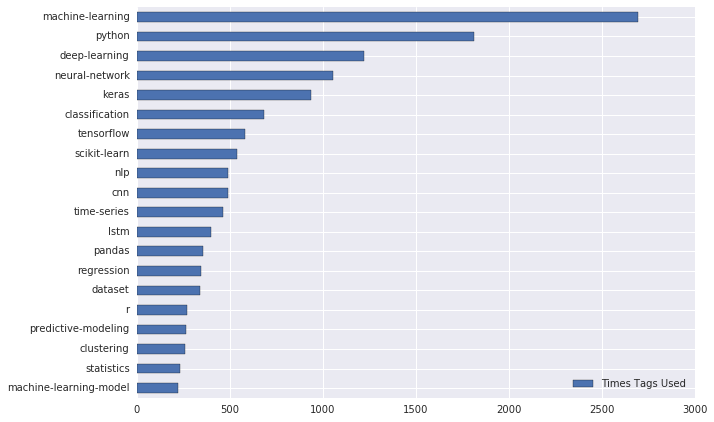

In [31]:
top_qtags_used.plot(kind='barh', figsize=(10,7))
plt.show()

Of the top tags used over time, deep learning tags should include: deep learning, machine learning, neural network,classification, TensorFlow, SciKit Learn,and cnn. These are the top tags used that are related to deep learning.
If we look at the questions asked per year that have these tags, we can track interest in deep learning.

In [38]:
#def categorize(tag):
#    for tags in all_quests['Tags']:
#         if "deep-learning" in tags:
#             return "Deep Learning"
#         elif "machine-learning" in tags:
#             return "Deep Learning"
#         elif "neural-network" in tags:
#             return "Deep Learning"
#         elif "classification" in tags:
#             return "Deep Learning"
#         elif "tensorflow" in tags:
#             return "Deep Learning"
#         elif "sciKit-learn" in tags:
#             return "Deep Learning"
#         elif "cnn" in tags:
#             return "Deep Learning"
#         else:
#             return "None"

deep_learning_tags = ['deep-learning', 'cnn', 'tensor flow', 'deep-learning']
def detect_dl_tag(tags, deep_learning_tags):
    if any([tag.lower() in deep_learning_tags for tag in tags]):
        return 1

all_quests['Deep Learning'] = all_quests['Tags'].apply(lambda x: detect_dl_tag(x, deep_learning_tags))
                            
year = all_quests["CreationDate"].dt.year
all_quests['Year'] = year
quarter = all_quests['CreationDate'].dt.quarter
all_quests['Quarter'] = quarter
all_quests.head()                            
                            

,Id,CreationDate,Tags,Deep Learning,Year,Quarter
0,45416,2019-02-12 00:36:29,"[python, keras, tensorflow, cnn, probability]",1.0,2019,1
1,45418,2019-02-12 00:50:39,[neural-network],NaN,2019,1
2,45422,2019-02-12 04:40:51,"[python, ibm-watson, chatbot]",NaN,2019,1
3,45426,2019-02-12 04:51:49,[keras],NaN,2019,1
4,45427,2019-02-12 05:08:24,"[r, predictive-modeling, machine-learning-mode...",NaN,2019,1


As we can see, the tags for deep learning increased yearly. The exception is 2020. Since we are still in 2020, we can assume that the data for 2020 is incomplete and we will exclude it.

In [ ]:
tps = all_quests[all_quests["CreationDate"].dt.year < 2020]

In [48]:
tps_year = all_quests.groupby('Year').agg({"Deep Learning": ['sum', 'size']})
#Creates a single level column header instead of double as was in case of agg function
tps_year.columns = ['DeepLearningQuestions', 'TotalQuestions']
tps_year["DeepLearningRate"] = tps_year["DeepLearningQuestions"]\
                                /tps_year["TotalQuestions"]
tps_year

,DeepLearningQuestions,TotalQuestions,DeepLearningRate
Year,,,
2014,8.0,562,0.014235
2015,30.0,1167,0.025707
2016,157.0,2146,0.073159
2017,435.0,2957,0.147109
2018,1053.0,5475,0.192329
2019,1544.0,8810,0.175255
2020,86.0,459,0.187364


In [47]:
tps_qy = all_quests.groupby(['Year', 'Quarter']).agg({"Deep Learning": ['sum', 'size']})
tps_qy.columns = ['DeepLearningQuestions', 'TotalQuestions']
tps_qy["DeepLearningRate"] = tps_qy["DeepLearningQuestions"]\
                                /tps_qy["TotalQuestions"]
tps_qy

DeepLearningQuestions  TotalQuestions  DeepLearningRate
Year Quarter                                                         
2014 2                          1.0             157          0.006369
     3                          1.0             189          0.005291
     4                          6.0             216          0.027778
2015 1                          3.0             190          0.015789
     2                          7.0             284          0.024648
     3                          8.0             311          0.025723
     4                         12.0             382          0.031414
2016 1                         27.0             516          0.052326
     2                         36.0             518          0.069498
     3                         47.0             585          0.080342
     4                         47.0             527          0.089184
2017 1                         95.0             698          0.136103
     2                         73.0             647          0.112828
     3                        103.0             714          0.144258
     4                        164.0             898          0.182628
2018 1                        247.0            1221          0.202293
     2                        268.0            1448          0.185083
     3                        318.0            1512          0.210317
     4                        220.0            1294          0.170015
2019 1                        340.0            1987          0.171112
     2                        415.0            2393          0.173422
     3                        424.0            2394          0.177109
     4                        365.0            2036          0.179273
2020 1                         86.0             459          0.187364

Interest in deep learning increased from 0.6% in 2014 to 17.9% by the last quarter of 2019. As interest in this sector of data science is becoming increasingly popular, we should write more about deep learning.